# Plant Disease Prediction

## Importing libraries

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [33]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [34]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [35]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [36]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [37]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [38]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [39]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [40]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [41]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [42]:
cnn.add(tf.keras.layers.Flatten())

In [43]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [44]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [45]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [46]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_21 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

In [48]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2024-11-13 22:51:39.313155: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2197/2197 [==============================] - 4683s 2s/step - loss: 1.4015 - accuracy: 0.5896 - val_loss: 0.4784 - val_accuracy: 0.8570
Epoch 2/10
2197/2197 [==============================] - 3052s 1s/step - loss: 0.4556 - accuracy: 0.8557 - val_loss: 0.3049 - val_accuracy: 0.9041
Epoch 3/10
2197/2197 [==============================] - 2095s 953ms/step - loss: 0.2807 - accuracy: 0.9092 - val_loss: 0.1992 - val_accuracy: 0.9375
Epoch 4/10
2197/2197 [==============================] - 1967s 895ms/step - loss: 0.1914 - accuracy: 0.9380 - val_loss: 0.1646 - val_accuracy: 0.9483
Epoch 5/10
2197/2197 [==============================] - 1900s 865ms/step - loss: 0.1378 - accuracy: 0.9548 - val_loss: 0.2074 - val_accuracy: 0.9364
Epoch 6/10
2197/2197 [==============================] - 1944s 885ms/step - loss: 0.1115 - accuracy: 0.9631 - val_loss: 0.1615 - val_accuracy: 0.9479
Epoch 7/10
2197/2197 [==============================] - 2009s 915ms/step - loss: 0.0902 - accuracy: 0.9702 - val_loss: 0.13

## Evaluating Model

In [49]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 503s 229ms/step - loss: 0.0545 - accuracy: 0.9827
Training accuracy: 0.9826730489730835


In [50]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 159s 288ms/step - loss: 0.1647 - accuracy: 0.9549
Validation accuracy: 0.954871416091919


### Saving Model

In [51]:
cnn.save('trained_plant_disease_model.keras')

In [52]:


training_history.history #Return Dictionary of history

{'loss': [1.4014650583267212,
  0.4555855989456177,
  0.2806554436683655,
  0.19137237966060638,
  0.13780587911605835,
  0.11154455691576004,
  0.09021704643964767,
  0.07525000721216202,
  0.0630347728729248,
  0.05637763440608978],
 'accuracy': [0.5895867347717285,
  0.8556938767433167,
  0.9091827273368835,
  0.9380325675010681,
  0.9547762870788574,
  0.9630556702613831,
  0.9702112674713135,
  0.9756881594657898,
  0.9796286821365356,
  0.9820044040679932],
 'val_loss': [0.47839629650115967,
  0.3048643469810486,
  0.19921749830245972,
  0.16462746262550354,
  0.20739814639091492,
  0.16147825121879578,
  0.13892994821071625,
  0.1299256682395935,
  0.14776772260665894,
  0.164662703871727],
 'val_accuracy': [0.8570452928543091,
  0.9041088223457336,
  0.9374573230743408,
  0.9482699632644653,
  0.936432957649231,
  0.9479285478591919,
  0.956009566783905,
  0.9606191515922546,
  0.9554973840713501,
  0.954871416091919]}

In [53]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [54]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

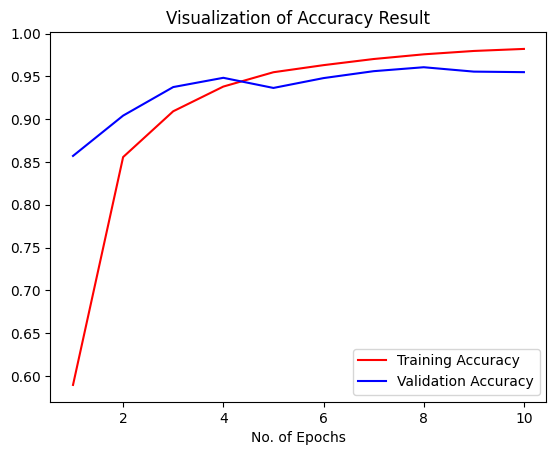

In [55]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [56]:
class_name = validation_set.class_names

In [57]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [58]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 343s 20ms/step


In [59]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [60]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [61]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

### Precision Recall Fscore

In [62]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [63]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.92      0.95       504
                                 Apple___Black_rot       0.98      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.95      0.96       440
                                   Apple___healthy       0.97      0.95      0.96       502
                               Blueberry___healthy       0.97      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.95      0.97      0.96       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.94      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.93      0.

### Confusion Matrix Visualization

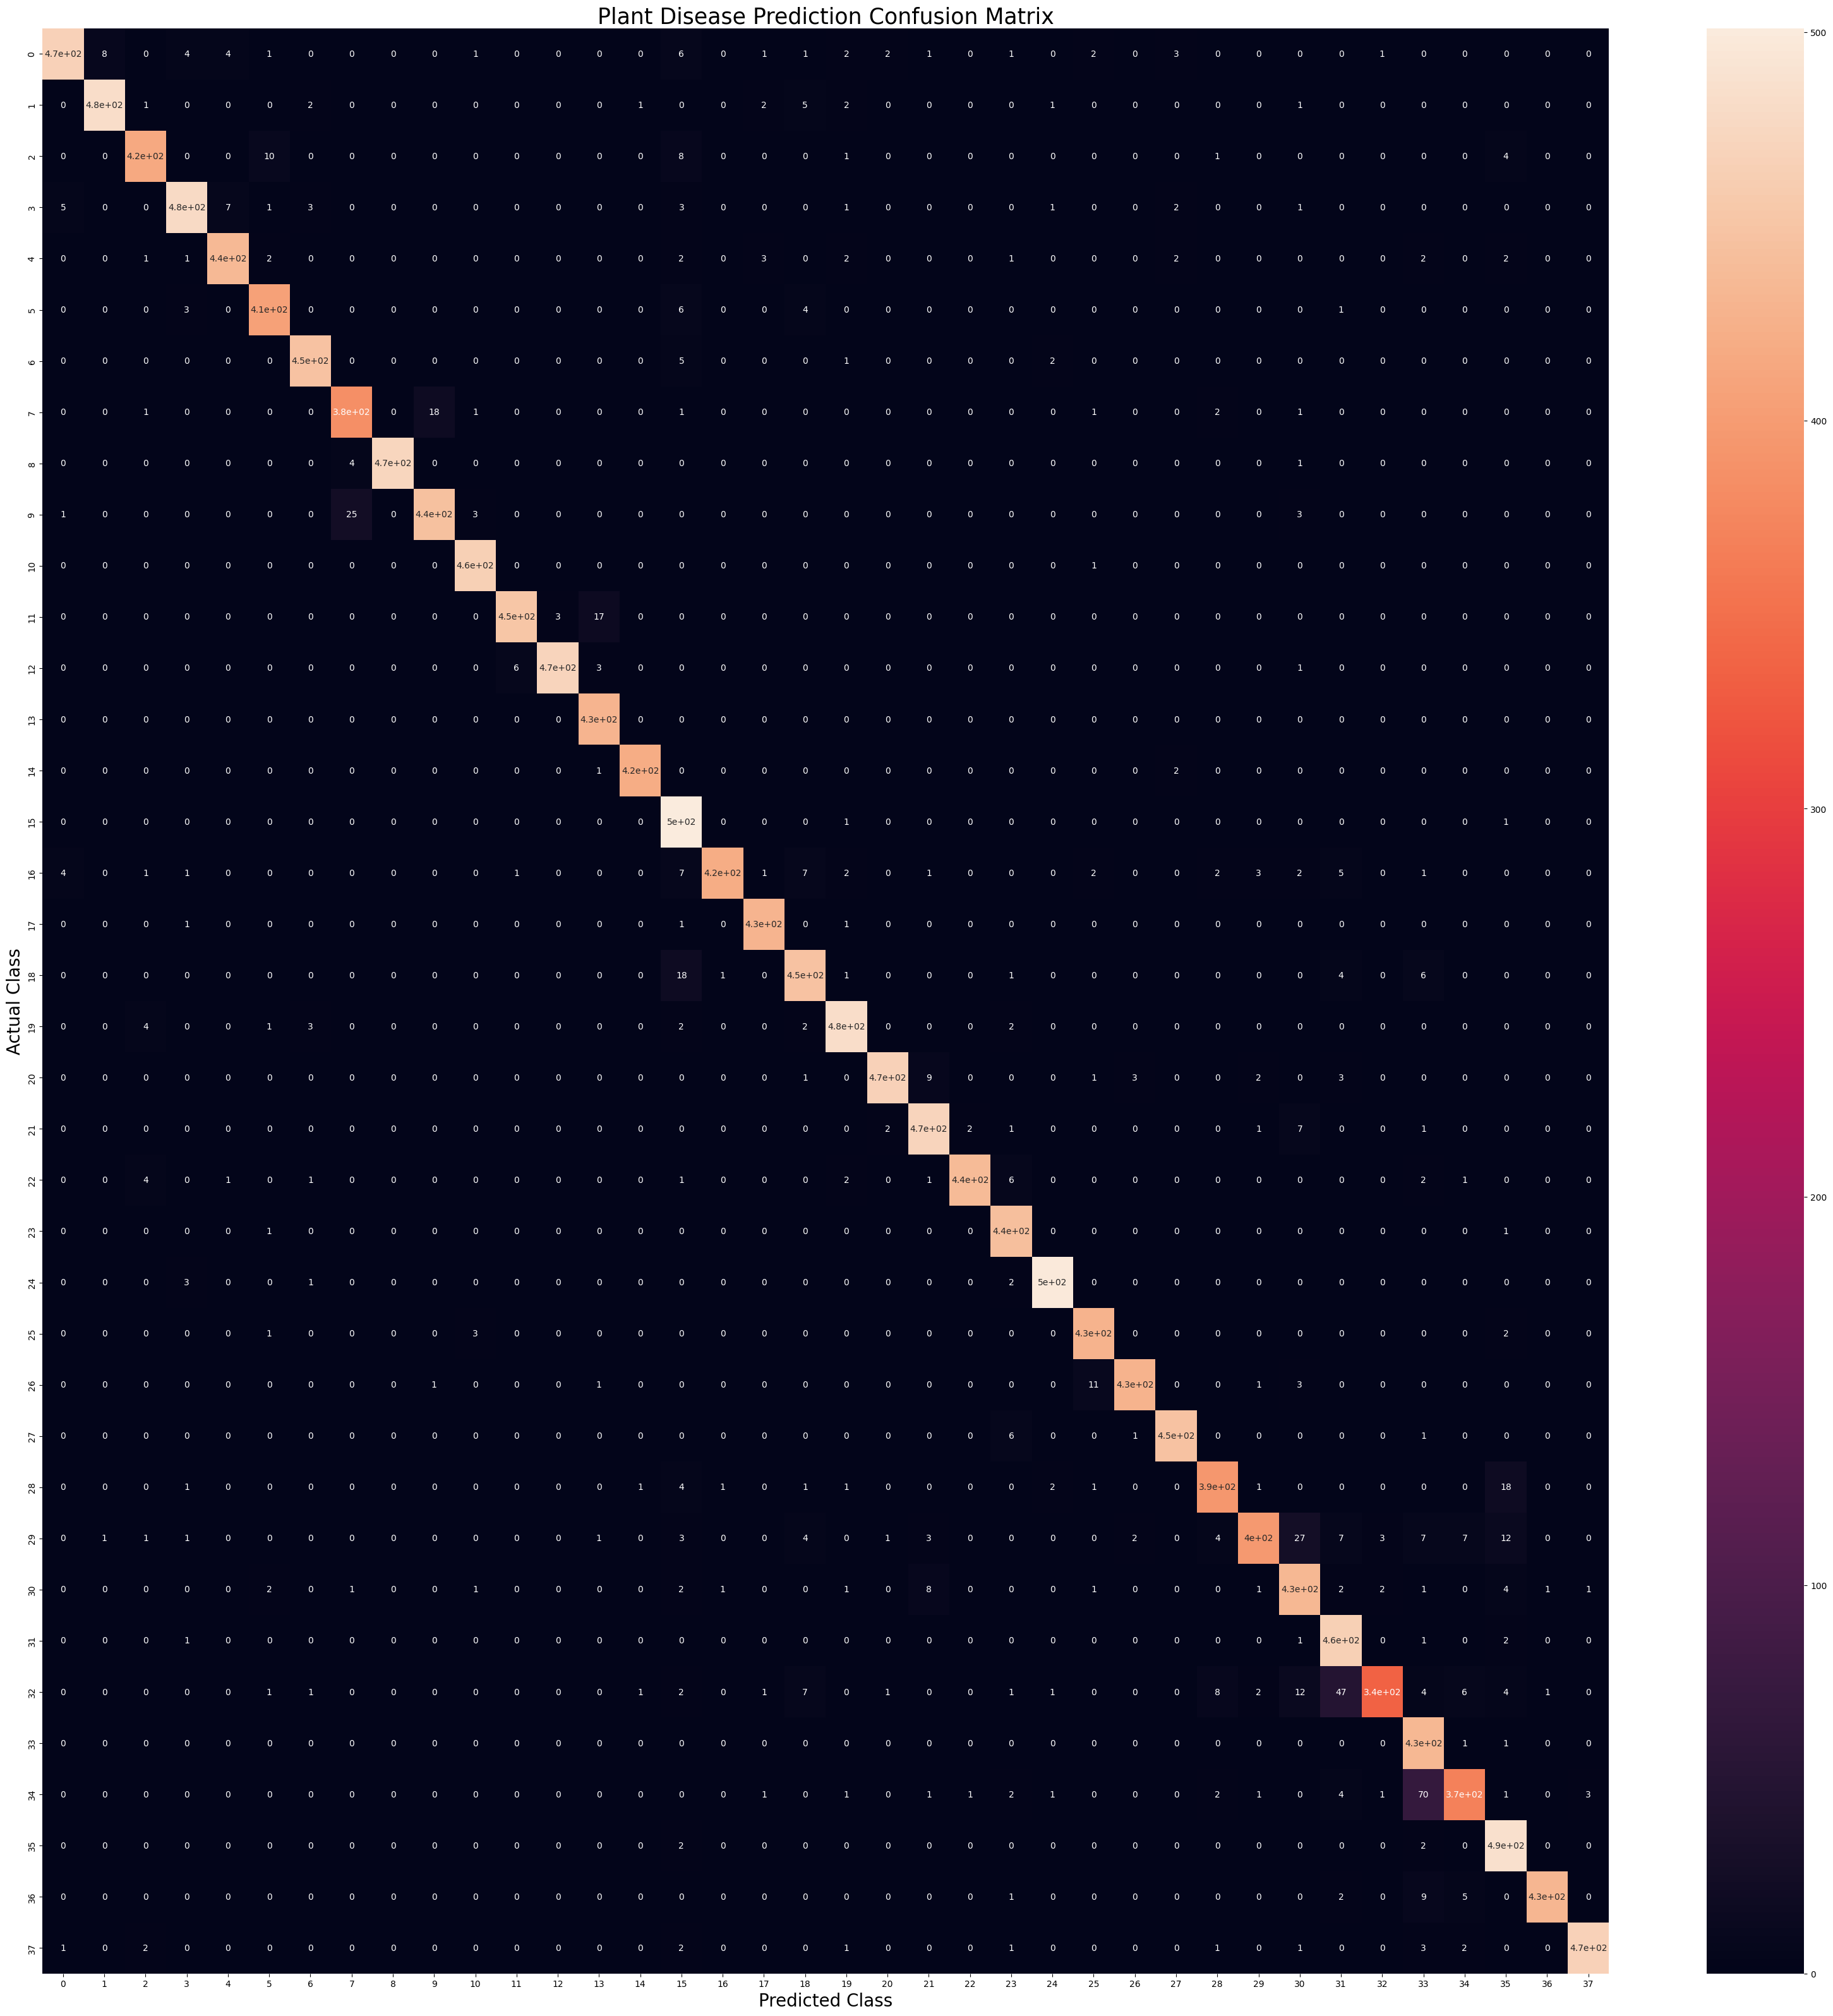

In [64]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()